# Определение перспективного тарифа для телеком компании

Клиентам федерального оператора сотовой связи «Мегалайн» предлагают два тарифных плана: ***«Смарт»*** и ***«Ультра»***. 
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. 

В распоряжении 5 датасетов с данными 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

После одготовки и анализа данных необходимо проверить ряд гипотез, а именно:
1. Средняя выручка пользователей тарифов ***«Ультра»*** и ***«Смарт»*** различается;
2. Средняя выручка пользователей из ***Москвы*** отличается от выручки пользователей из ***других регионов***;


### План проекта
1. Открытие файлов с данными и изучение общей информации;
2. Подготовка данных;
3. Анализ данных;
4. Проверка гипотез;
5. Общий вывод.

### Шаг 1. Открытие файлов с данными и изучение общей информации. 

In [1]:
import pandas as pd #Импортирую библиотеку pandas
import matplotlib.pyplot as plt #Импортирую библиотеку matplotlib
import numpy as np #Импортирую библиотеку высокоуровневых математических функций numpy
from scipy import stats as st # Из библиотеки scipy импортирую медод stats
import math #Импортирую модуль math
#Читаю файлы с данными
calls_df = pd.read_csv('/datasets/calls.csv') 
internet_df = pd.read_csv('/datasets/internet.csv')
messages_df = pd.read_csv('/datasets/messages.csv') 
tariffs_df = pd.read_csv('/datasets/tariffs.csv') 
users_df = pd.read_csv('/datasets/users.csv')
#Печатаю первые 5 строк каждой таблицы для ознакомления с данными
#calls_df.display()
display(calls_df.head())
print()
display(internet_df.head())
print()
display(messages_df.head())
print()
display(tariffs_df.head())
print()
display(users_df.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Описание  полученных данных
Для обработки получены следующие датасеты:

<br>**Таблица users (информация о пользователях):**
<br>•	user_id — уникальный идентификатор пользователя
<br>•	first_name — имя пользователя
<br>•	last_name — фамилия пользователя
<br>•	age — возраст пользователя (годы)
<br>•	reg_date — дата подключения тарифа (день, месяц, год)
<br>•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
<br>•	city — город проживания пользователя
<br>•	tariff — название тарифного плана

<br>**Таблица calls (информация о звонках):**
<br>•	id — уникальный номер звонка
<br>•	call_date — дата звонка
<br>•	duration — длительность звонка в минутах
<br>•	user_id — идентификатор пользователя, сделавшего звонок

<br>**Таблица messages (информация о сообщениях):**
<br>•	id — уникальный номер сообщения
<br>•	message_date — дата сообщения
<br>•	user_id — идентификатор пользователя, отправившего сообщение

<br>**Таблица internet (информация об интернет-сессиях):**
<br>•	Unnamed: 0 — столбец со значениями повторяющими индексы датасета
<br>•	id — уникальный номер сессии
<br>•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
<br>•	session_date — дата интернет-сессии
<br>•	user_id — идентификатор пользователя

<br>**Таблица tariffs (информация о тарифах):**
<br>•	tariff_name — название тарифа
<br>•	rub_monthly_fee — ежемесячная абонентская плата в рублях
<br>•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
<br>•	messages_included — количество сообщений в месяц, включённых в абонентскую плату
<br>•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
<br>•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
<br>•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета
<br>•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [2]:
#Получаю информацию по каждому датасету
calls_df.info()
print()
internet_df.info()
print()
messages_df.info()
print()
tariffs_df.info()
print()
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

<class 'pandas.core.frame.DataFrame'>
R

### Индивидуальное рассмотрение  полученных данных
Индивидуально рассмотрю некоторые столбцы в следующих датасетах: *users_df, calls_df, internet_df*

In [3]:
print('Даты прекращения пользования тарифом')
print(users_df['churn_date'].unique()) #Определяю уникальные значения столбца
print('_____________________________________')
print('Города проживания абонентов')
print(users_df['city'].unique()) #Определяю уникальные значения столбца
print('_____________________________________')
print('Уникальные значения в столбце Тариф')
print(users_df['tariff'].unique()) #Определяю уникальные значения столбца
print('_____________________________________')
print('Количество звонков с длительностью 0.0 равно', len(calls_df.query('duration == 0.0')))
print('_____________________________________')
print('Количество интернет-сессий с объемом трафика 0.0 равно', len(internet_df.query('mb_used == 0.0')))

Даты прекращения пользования тарифом
[nan '2018-10-05' '2018-12-18' '2018-11-21' '2018-10-03' '2018-10-14'
 '2018-12-09' '2018-12-11' '2018-12-26' '2018-08-31' '2018-12-03'
 '2018-12-23' '2018-11-07' '2018-12-16' '2018-12-20' '2018-11-30'
 '2018-12-21' '2018-08-17' '2018-09-02' '2018-10-04' '2018-11-13'
 '2018-11-22' '2018-10-28' '2018-11-26' '2018-11-27' '2018-11-16'
 '2018-10-27' '2018-12-30' '2018-09-27' '2018-12-25' '2018-12-14'
 '2018-12-24' '2018-09-26' '2018-10-25']
_____________________________________
Города проживания абонентов
['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Во

### Вывод к Шагу 1

Для проведения статистического анализа предоставлена репрезентативная выборка составленная из данных по абонентам оператора мобильной связи "Мегалайн". В совокупности имеется 5 датасетов.

<br>**Датасет calls_df**<br>
Состоит из 202607 строк с данными. Пропущенные значения отсутствуют. В столбце 'call_date' необходимо заменить тип данных на 'datetime'. Появление данных типа object в этом столбце вызвано особенностью конвертирования из базы данных в формат .csv, вероятно стоит обратить внимание на этот момент, и попробовать оптимизировать процесс конвертирования. В столбце 'duration' необходимо округлить значения вверх до ближайшего целого числа, поскольку «Мегалайн» всегда округляет вверх значения минут и перевести данные в тип int. Также в столбце 'duration' имеется 39613 строк с длительностю разговора 0.0 минут что составлет 19,6% от всего датасета. Скорее всего это звонки без ответа (пропущенные вызовы) или ошибочные дозвоны. Их невозможно учесть в показателях выручки, а в дальнейшем они могут сказаться на статистическом анализе сместив среднее и медиану влево, следовательно их нужно удалить. Возникновение этих строк нельзя назвать ошибочными, посокльку факт звонка имел место быть и биллинговая система его учла. 

<br>**Датасет internet_df**<br>
Состоит из 149396 строк с данными. Пропущенные значения отсутствуют. В столбце 'session_date' необходимо заменить тип данных на 'datetime'. Появление данных типа object в этом столбце вызвано особенностью конвертирования из базы данных в формат .csv, вероятно стоит обратить внимание на этот момент, и попробовать оптимизировать процесс конвертирования. В столбце 'mb_used' необходимо округлить значения вверх до ближайшего целого числа, поскольку «Мегалайн» всегда округляет вверх значения мегабайтов и перевести данные в тип int. Также в столбце 'mb_used' имеется 19598 строк с объемом использованного трафика 0.0 мегабайт что составлет 13,4% от всего датасета. Скорее всего это сессии связанные с получением данных очень малого объема (n<0.05 мб). Эти сессии невозможно учесть в показателях выручки, а в дальнейшем они могут сказаться на статистическом анализе сместив среднее и медиану влево, следовательно их нужно удалить. Возникновение этих строк нельзя назвать ошибочными, посокльку факт инернет-сессии имел место быть и биллинговая система его учла. Также в этом датасете имеется столбец 'Unnamed: 0' - он повторяет индексы, вероятно он возник из-за неправильной конвертации выгрузки из базы данных в .csv формат. Этот столбец необходимо удалить. Плюс ко всему стоит переименовать столбец 'tariff_name' на 'tariff', чтобы его название соврпадало с датасетом *users_df*.

<br>**Датасет messages_df**<br>
Состоит из 123036 строк с данными. Пропущенные значения отсутствуют. В столбце 'message_date' необходимо заменить тип данных на 'datetime'. Появление данных типа object в этом столбце вызвано особенностью конвертирования из базы данных в формат .csv, вероятно стоит обратить внимание на этот момент, и попробовать оптимизировать процесс конвертирования.

<br>**Датасет tariffs_df**<br>
Состоит из 2 строк с данными, характеризующие тарифы. Пропущенные значения отсутствуют. Название столбца 'tariff_name' выбрано ошибочно, далее его необходимо заменить на 'tariff', поскольку в датасете *users_df* столбец имеет именно такое название. Название столбца 'mb_per_month_included' также выбрано ошибочно, поскольку не соответствует двум другим. В дальнейшем его необходимо заменть на 'mb_included' для облегчения восприятия данных. Предлагаю заменть названия этих столбцов в том числе и в исходной базе данных, для удобства при дальнейшем использовании.

<br>**Датасет users_df**<br>
Состоит из 500 строк с данными. В столбце 'churn_date' имеются пропущенные значения - это абоненты на сегодняшний день использующие данные тарифы, 38 ненулевых значений это даты прекращения использования выбранными тарифами. То есть 7,6% абонентов перкратили использовать тарифы. Отметим, что даты прекращения тарифного обслуживания лежат в диапазоне август - декабрь 2018 года. Отток абонентов вероятно связан с тем, что в это время кто-либо из конкурентов выкатил на рынок новый промо-тариф, чем переманил чатсь абонентов, или же просто выборка взята на указанном промежутке времени. Проверим в дальнейшем. В столбце 'city' предоставлены "чистые" данные, то есть не требующие обработки. В столбце 'reg_date' необходимо заменить тип данных на 'datetime'. Появление данных типа object в этом столбце вызвано особенностью конвертирования из базы данных в формат .csv, вероятно стоит обратить внимание на этот момент, и попробовать оптимизировать процесс конвертирования. Иных ошибок в этом датасете нет.

### Шаг 2. Подготовка данных. 

Руководствуясь выводами из Шага 1 провожу подготовку данных.

In [4]:
#Удаляю нулевые значения в столбцах 'duration' и 'mb_used'
calls_df = calls_df.query('duration > 0.0')
internet_df = internet_df.query('mb_used > 0.0')
#Проверяю результаты
print('Количество строк в датасете calls_df после удаления 0.0 равно', len(calls_df))
print('Количество строк в датасете internet_df после удаления 0.0 равно', len(internet_df))
print('_____________________________________')
#Заменю названия столбцов в датасете tariffs_df
tariffs_df.rename(columns=lambda x: x.replace('tariff_name', 'tariff'), inplace=True)
tariffs_df.rename(columns=lambda x: x.replace('mb_per_month_included', 'mb_included'), inplace=True)
tariffs_df.info()

Количество строк в датасете calls_df после удаления 0.0 равно 162994
Количество строк в датасете internet_df после удаления 0.0 равно 129798
_____________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included    2 non-null int64
mb_included          2 non-null int64
minutes_included     2 non-null int64
rub_monthly_fee      2 non-null int64
rub_per_gb           2 non-null int64
rub_per_message      2 non-null int64
rub_per_minute       2 non-null int64
tariff               2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [5]:
#Заменяю типы данных
def to_datetime_convert(data,column): #Объявляю функцию конвертирования типов данных в datetime
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
#Заменяю типы данных на datetime    
to_datetime_convert(calls_df,'call_date')
to_datetime_convert(internet_df,'session_date')
to_datetime_convert(messages_df,'message_date')
to_datetime_convert(users_df,'reg_date')

def round_up_duration(row): #объявляю функцию для округления вверх и для конвертирования типов данных в int
    up = row['duration']
    result = math.ceil(up)
    return result

calls_df['duration'] = calls_df.apply(round_up_duration,axis=1) #Применяю функцию

def round_up_mb_used(row): #объявляю функцию для округления вверх и для конвертирования типов данных в int
    mb_up = row['mb_used']
    result = math.ceil(mb_up)
    return result

internet_df['mb_used'] = internet_df.apply(round_up_mb_used,axis=1) #Применяю функцию

#Удаляю лишний столбец из датасета internet_df
del internet_df['Unnamed: 0']

#Удаляю столбцы с ненужными для анализа данными
del users_df['first_name']
del users_df['last_name']

#Проверяю результаты замены данных
calls_df.info()
print('_____________________________________')
internet_df.info()
print('_____________________________________')
messages_df.info()
print('_____________________________________')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
_____________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null int64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB
_____________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[n

In [8]:
# Код ревьюера
calls_df['duration'] = calls_df.duration.apply(np.ceil)
calls_df['duration']

2          3.0
3         14.0
4          6.0
7         19.0
8         19.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 162994, dtype: float64

<br>**Промежуточный вывод к Шагу 2.**<br>
Данные связанные с датами приведены к типу datetime во всех датасетах. Значения использованных минут и мегабайтов округлены вверх до целого числа (приведены к типу int). Удалены строки с нулевыми значениями в столбцах 'duration' и 'mb_used'. В данном случае значения 0.0 в столбце 'duration' появились из-за того, что в выборку попали неотвеченные звонки, а значения 0.0 в столбце 'mb_used' можно посчитать ошибкой, или, как было отмечено выше, это сессии связанные с получением данных очень малого объема (n<0.05 мб). Дополнительно был удален столбец 'Unnamed: 0' из датасета *internet_df*, его появление тоже можно отнести к ошибочному, вероятно он возник из-за неправильной конвертации выгрузки из базы данных в .csv формат, или из-за самой структуры базы данных. Плюс к этому удалены столбцы с ненужной информацией 'first_name', и 'last_name' в датасете *users_df*. Также были переименованы столбцы в датасете *tariffs_df*, что тоже можно отнести к исправлению ошибок. 

<br>**Добавление необходимых метрик**<br>
<br>• количество сделанных звонков и израсходованных минут разговора по месяцам;
<br>• количество отправленных сообщений по месяцам;
<br>• объем израсходованного интернет-трафика по месяцам;
<br>• помесячную выручку с каждого пользователя.

In [6]:
#Ко всем датасетам добавим столбец месяца
calls_df['month'] = calls_df['call_date'].dt.month
internet_df['month'] = internet_df['session_date'].dt.month
messages_df['month'] = messages_df['message_date'].dt.month

In [7]:
#Составляю сводную таблицу количество сделанных звонков по месяцам
calls_pivot = calls_df.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'count')
#Составляю сводную таблицу количество израсходованных минут разговора 
minutes_pivot = calls_df.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')
#Составляю сводную таблицу количество отправленных сообщений по месяцам
messages_pivot = messages_df.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count')
#Составляю сводную таблицу объем израсходованного интернет-трафика по месяцам
internet_pivot = internet_df.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')

display(calls_pivot.head(10))
print('__________________________________________________________________')
display(minutes_pivot.head(10))
print('__________________________________________________________________')
display(messages_pivot.head(10))
print('__________________________________________________________________')
display(internet_pivot.head(10))

duration
user_id month          
1000    5            17
        6            28
        7            41
        8            42
        9            46
        10           44
        11           37
        12           38
1001    11           45
        12           47

__________________________________________________________________


duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
        10          350
        11          338
        12          333
1001    11          430
        12          414

__________________________________________________________________


message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
        10               73
        11               58
        12               70
1002    6                 4
        7                11

__________________________________________________________________


mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
        10       14717
        11       14768
        12        9827
1001    11       18452
        12       14053

In [8]:
#Свожу все расходы в одну таблицу
rate_df = minutes_pivot.merge(messages_pivot, on=['user_id','month']).merge(internet_pivot, on=['user_id','month'], how = 'left')

#Сбрасываю индекс 'month'
rate_df=rate_df.reset_index(level='month')

#Переименовываю столбцы
new_names = ['month', 'minutes_used','messages_used','mb_used']
rate_df.set_axis(new_names, axis = 'columns', inplace = True)

In [9]:
#Для расчета помесячной выручки с каждого пользователя, объединяю полученные метрики в одну таблицу, также добавляю 'tariffs_df'
users_df=users_df.merge(tariffs_df, on='tariff', how = 'left')
users_df=users_df.merge(rate_df, on='user_id')
users_df.info()
display(users_df.head(50))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673 entries, 0 to 2672
Data columns (total 17 columns):
user_id              2673 non-null int64
age                  2673 non-null int64
churn_date           140 non-null object
city                 2673 non-null object
reg_date             2673 non-null datetime64[ns]
tariff               2673 non-null object
messages_included    2673 non-null int64
mb_included          2673 non-null int64
minutes_included     2673 non-null int64
rub_monthly_fee      2673 non-null int64
rub_per_gb           2673 non-null int64
rub_per_message      2673 non-null int64
rub_per_minute       2673 non-null int64
month                2673 non-null int64
minutes_used         2673 non-null int64
messages_used        2673 non-null int64
mb_used              2660 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(12), object(3)
memory usage: 375.9+ KB


,user_id,age,churn_date,city,reg_date,tariff,messages_included,mb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,minutes_used,messages_used,mb_used
0,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5,159,22,2256.0
1,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6,172,60,23257.0
2,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7,340,75,14016.0
3,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8,408,81,14070.0
4,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9,466,57,14581.0
5,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,10,350,73,14717.0
6,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,11,338,58,14768.0
7,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,12,333,70,9827.0
8,1002,59,NaN,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3,6,117,4,10871.0
9,1002,59,NaN,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3,7,214,11,17601.0


In [10]:
#Рассчитываем помесячную выручку с каждого абонента, 
#Заметка: количество мегабайтов израсходованных абонентом сверх тарифа делю на 1024, тобы перевести в гигабайты
users_df['gain'] = users_df['rub_monthly_fee'] + np.where(users_df['minutes_used']-users_df['minutes_included']>0, (users_df['minutes_used']-users_df['minutes_included'])*users_df['rub_per_minute'], 0) + np.where(users_df['messages_used']-users_df['messages_included']>0, (users_df['messages_used']-users_df['messages_used'])*users_df['rub_per_message'], 0) + np.where(users_df['mb_used']-users_df['mb_included']>0, ((users_df['mb_used']-users_df['mb_included'])/1024)*users_df['rub_per_gb'], 0)

#Привожу данные по ежемесячной выручке к типу int 
users_df['gain'] = users_df['gain'].astype('int')

display(users_df.head(10))

,user_id,age,churn_date,city,reg_date,tariff,messages_included,mb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,minutes_used,messages_used,mb_used,gain
0,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5,159,22,2256.0,1950
1,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6,172,60,23257.0,1950
2,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7,340,75,14016.0,1950
3,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8,408,81,14070.0,1950
4,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9,466,57,14581.0,1950
5,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,10,350,73,14717.0,1950
6,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,11,338,58,14768.0,1950
7,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,12,333,70,9827.0,1950
8,1002,59,NaN,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3,6,117,4,10871.0,550
9,1002,59,NaN,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3,7,214,11,17601.0,987


### Вывод к Шагу 2.

Как указано в промежуточном вывод к Шагу 2, была проведена подготовка данных, а именно: приведение к нужным типам, исправление ошибок, удаление столбцов с ненужными данными, преобразование таблиц. 
<br>Дополнительно добавлены нужные для дальнейшей работы метрики:
<br>• количество сделанных звонков и израсходованных минут разговора по месяцам;
<br>• количество отправленных сообщений по месяцам;
<br>• объем израсходованного интернет-трафика по месяцам;
<br>• помесячную выручку с каждого пользователя.
<br>Эти метрики позволят нам на следующих шагах проанализировать данные и решить поставленные задачи.

### Шаг 3. Анализ данных.

Для проведения анализа данных рассчитаю средние показатели расходов минут, сообщений и мегабайтов для каждого абонента

In [11]:
#Разделю таблицу на две по тарифам
ultra_users = users_df.query('tariff == "ultra"')
smart_users = users_df.query('tariff == "smart"')

#Найду среднее, дисперсию и стандартное отклонение по каждому показателю по обоим тарифам
print('Для тарифа "Ультра"')
print()
print('Среднее значение расхода минут на тарифе "Ультра":', ultra_users['minutes_used'].mean().round())
print('Среднее значение расхода сообщений на тарифе "Ультра":', ultra_users['messages_used'].mean().round())
print('Среднее значение расхода мегабайтов на тарифе "Ультра":', ultra_users['mb_used'].mean().round())
print()
print('Стандартное отклонение расхода минут на тарифе "Ультра":', ultra_users['minutes_used'].std().round())
print('Стандартное отклонение расхода сообщений на тарифе "Ультра":', ultra_users['messages_used'].std().round())
print('Стандартное отклонение расхода мегабайтов на тарифе "Ультра":', ultra_users['mb_used'].std().round())
print()
print('Дисперсия по расходу минут на тарифе "Ультра":', ultra_users['minutes_used'].var().round())
print('Дисперсия по расходу сообщений на тарифе "Ультра":', ultra_users['messages_used'].var().round())
print('Дисперсия по расходу мегабайтов на тарифе "Ультра":', ultra_users['mb_used'].var().round())
print()
print('Для тарифа "Смарт"')
print()
print('Среднее значение расхода минут на тарифе "Смарт":', smart_users['minutes_used'].mean().round())
print('Среднее значение расхода сообщений на тарифе "Смарт":', smart_users['messages_used'].mean().round())
print('Среднее значение расхода мегабайтов на тарифе "Смарт":', smart_users['mb_used'].mean().round())
print()
print('Стандартное отклонение расхода минут на тарифе "Смарт":', smart_users['minutes_used'].std().round())
print('Стандартное отклонение расхода сообщений на тарифе "Смарт":', smart_users['messages_used'].std().round())
print('Стандартное отклонение расхода мегабайтов на тарифе "Смарт":', smart_users['mb_used'].std().round())
print()
print('Дисперсия по расходу минут на тарифе "Смарт":', smart_users['minutes_used'].var().round())
print('Дисперсия по расходу сообщений на тарифе "Смарт":', smart_users['messages_used'].var().round())
print('Дисперсия по расходу мегабайтов на тарифе "Смарт":', smart_users['mb_used'].var().round())

Для тарифа "Ультра"

Среднее значение расхода минут на тарифе "Ультра": 555.0
Среднее значение расхода сообщений на тарифе "Ультра": 61.0
Среднее значение расхода мегабайтов на тарифе "Ультра": 19628.0

Стандартное отклонение расхода минут на тарифе "Ультра": 311.0
Стандартное отклонение расхода сообщений на тарифе "Ультра": 44.0
Стандартное отклонение расхода мегабайтов на тарифе "Ультра": 9634.0

Дисперсия по расходу минут на тарифе "Ультра": 96688.0
Дисперсия по расходу сообщений на тарифе "Ультра": 1975.0
Дисперсия по расходу мегабайтов на тарифе "Ультра": 92816872.0

Для тарифа "Смарт"

Среднее значение расхода минут на тарифе "Смарт": 421.0
Среднее значение расхода сообщений на тарифе "Смарт": 39.0
Среднее значение расхода мегабайтов на тарифе "Смарт": 16276.0

Стандартное отклонение расхода минут на тарифе "Смарт": 187.0
Стандартное отклонение расхода сообщений на тарифе "Смарт": 27.0
Стандартное отклонение расхода мегабайтов на тарифе "Смарт": 5790.0

Дисперсия по расходу минут

Строю гистограммы распределения для средних значений расхода минут, сообщений и мегабайтов в месяц для пользователей каждого тарифа.

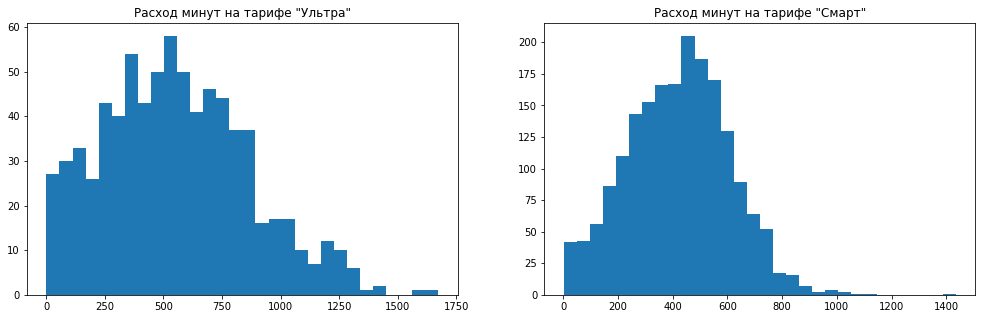

In [12]:
#Строю гистограммы по расходу минут абонентов обоих тарифов
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(17, 5)
)
 
ax1.hist(
    ultra_users['minutes_used'], bins=30,
) 

ax1.set_title('Расход минут на тарифе "Ультра"')
ax1.yaxis.tick_left()
 
ax2.hist(
    smart_users['minutes_used'], bins=30,
)

ax2.set_title('Расход минут на тарифе "Смарт"')
ax2.yaxis.tick_left()

plt.show()

<font color=blue> Гистограммы перестроил по полным данным</font>

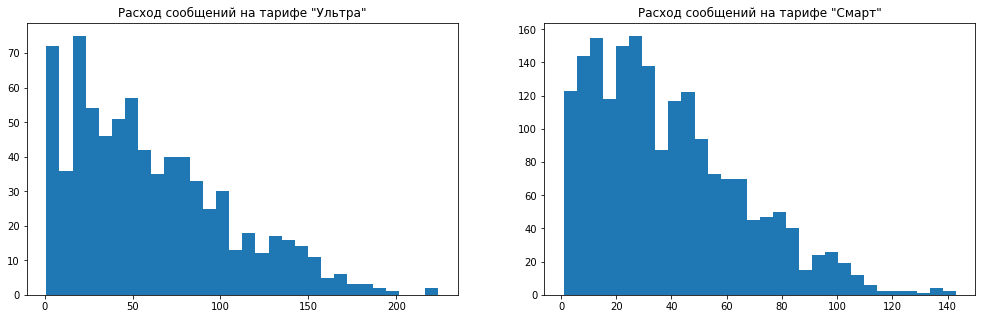

In [13]:
#Строю гистограммы по расходу сообщений абонентов обоих тарифов
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(17, 5)
)
 
ax1.hist(
    ultra_users['messages_used'], bins=30,
) 

ax1.set_title('Расход сообщений на тарифе "Ультра"')
ax1.yaxis.tick_left()
 
ax2.hist(
    smart_users['messages_used'], bins=30,
)

ax2.set_title('Расход сообщений на тарифе "Смарт"')
ax2.yaxis.tick_left()

plt.show()

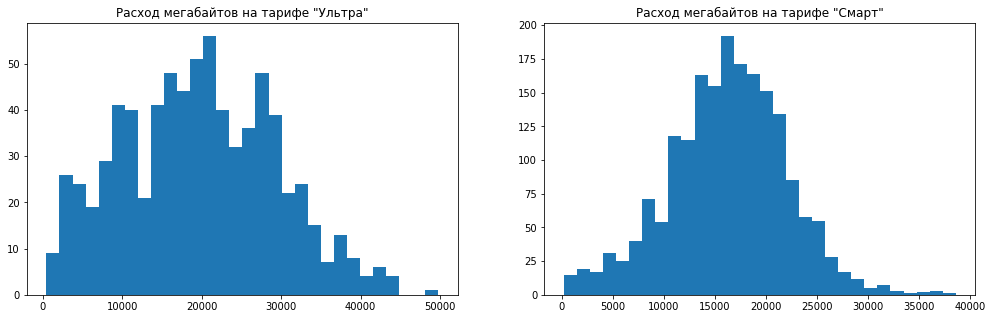

In [14]:
#Строю гистограммы по расходу мегабайтов абонентов обоих тарифов
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(17, 5)
)
 
ax1.hist(
    ultra_users['mb_used'], bins=30,
) 

ax1.set_title('Расход мегабайтов на тарифе "Ультра"')
ax1.yaxis.tick_left()
 
ax2.hist(
    smart_users['mb_used'], bins=30,
)

ax2.set_title('Расход мегабайтов на тарифе "Смарт"')
ax2.yaxis.tick_left()

plt.show()

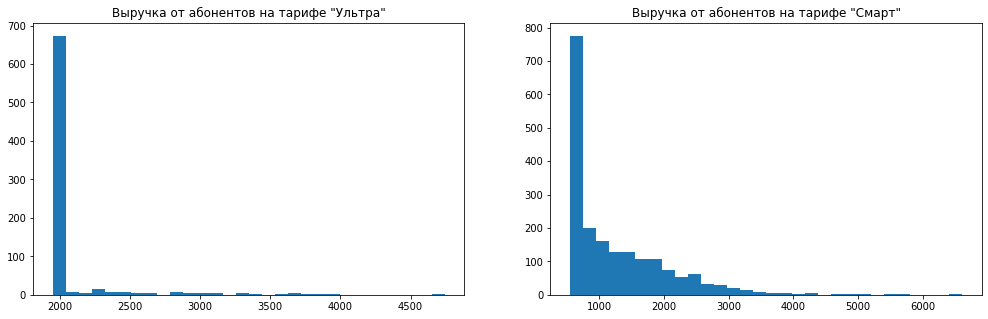

In [15]:
#Строю гистограммы по выручке от абонентов обоих тарифов
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(17, 5)
)
 
ax1.hist(
    ultra_users['gain'], bins=30,
) 

ax1.set_title('Выручка от абонентов на тарифе "Ультра"')
ax1.yaxis.tick_left()
 
ax2.hist(
    smart_users['gain'], bins=30,
)

ax2.set_title('Выручка от абонентов на тарифе "Смарт"')
ax2.yaxis.tick_left()

plt.show()

### Вывод к Шагу 3

На этом шаге посчитаны важные метрики, в частности, средние значения расхода минут, сообщений и мегабайт для пользователей каждого тарифа из выборки. Полученные данные приведены ниже. <br>
<br>**Для тарифа "Ультра"**

Среднее значение расхода минут на тарифе "Ультра": 555.0<br>
Среднее значение расхода сообщений на тарифе "Ультра": 61.0<br>
Среднее значение расхода мегабайтов на тарифе "Ультра": 19628.0<br>

<br>**Для тарифа "Смарт"**

Среднее значение расхода минут на тарифе "Смарт": 421.0<br>
Среднее значение расхода сообщений на тарифе "Смарт": 39.0<br>
Среднее значение расхода мегабайтов на тарифе "Смарт": 16276.0<br>

<br>Исходя из полученных данных, нетрудно видеть что абоненты тарифа "Ультра" в среднем используют 18,5% включенных минут, 6,1% включенных сообщений, 63,9% включенных мегабайтов.
<br>В свою очередь абоненты тарифа "Смарт" в среднем используют 84,0% включенных минут, 78,0% включенных сообщений, при этом в среднем идет перерасход использованных мегабайтов на 6,0% сверх лимита.


<br>Анализируя гистограммы можно сделать следующие выводы:<br>
<br>**Гистограмма - Расход минут на тарифе "Ультра"**
<br>Характер распределения близкий к нормальному, гистограмма скошена влево. Среднее значение равно 555 минутам. Характерно, что абоненты тарифа "Ультра" не используют и половины входящих в пакет минут. Есть вероятность что пользователи этого тарифа задумаются о его смене.
<br>**Гистограмма - Расход минут на тарифе "Смарт"**
<br>Характер распределения нормальный, данные симметрично распределены вокруг среднего значения, которое оказалось близким к максисмуму включенному в тариф. Из гистограммы видно, что половина абонентов из выборки в среднем превышают месячный лимит. Эта тарифная составляющая нуждается в пересмторе, поскольку очевидна нехватка входящих в лимит минут, а, как известно, абоненты крайне неохотно платят за услуги сверх тарифа.
<br>**Гистограмма - Расход сообщений на тарифе "Ультра"**
<br>Гистограмма сильно скошена влево, что говорит о низком спросе на СМС из-за использования мессенджеров, при этом максимальный показатель спроса около 230 СМС в месяц при бесплатном лимите 1000. Также очевидно, что в выборке имеются абоненты, которые вообще не пользуются сообщениями. Эта тарифная составляющая нуждается в пересмторе.
<br>**Гистограмма - Расход сообщений на тарифе "Смарт"**
<br>Гистограмма сильно скошена влево, при этом максимальный показатель спроса около 150 СМС в месяц при бесплатном в 50 сообщений. Абоненты этого тарифа значительно чаще используют весь пакет включенных сообщений, а немалая часть даже перерасходуют его. Хотя, стоит отметить, что и здесь есть доля абонентов, которые не пользуются сообщениями. 
<br>**Гистограмма - Расход мегабайтов на тарифе "Ультра"**
<br>Характер распределения нормальный, данные симметрично распределены вокруг среднего значения. Многие абоненты используют больше половины входящего в пакет трафика, также наблюдаются перерасходы, что говорит о высоком спросе на мобильнй интернет.
<br>**Гистограмма - Расход мегабайтов на тарифе "Смарт"**
<br>Характер распределения нормальный, данные симметрично распределены вокруг среднего значения, которое также оказалось выше включенного лимита. Следовательно больше половины абонентов используют дополнительные объемы трафика, оплачивая его сверх установленного лимита, что говорит о высоком спросе на мобильнй интернет.
<br>**Гистограмма - Выручка на тарифе "Ультра"**
<br>Не трудно видеть, что основная часть выручки находится на отметке 1950 рублей, следовательно подавляющая часть абонентов помесячно укладывается в отведенные лимиты и не переплачивает за перерасход тарифных составляющих, однако есть некоторое количество значений, превышающих абонентскую плату. Очевидно, что этим абонентам не хватает какой-либо составляющей в тарифе.
<br>**Гистограмма - Выручка на тарифе "Смарт"**
<br>Значительная часть выручки находится на отметке 550 рублей, следовательно бОльшая часть абонентов помесячно укладывается в отведенные лимиты и не переплачивает за перерасход тарифных составляющих. Но стоит обратить внимание что данная гистограмм спадает к нулю плавнее, чем на тарифе "Ультра", и более того - есть абоненты заплатившие за месяц более 6000 рублей, а это явный признак того, что данный тариф им не подходит, и они могут задуматся о его смене.

### Шаг 4. Проверка гипотез.

На этом шаге необходимо проверить две гипотезы:</br>
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Для этого нужно произвести еще ряд преобразований.

In [16]:
#Добавляю столбец с группировкой по городу проживания абонента - Москва или Другой. Для этого бъявляю функцию
def city_grp(row): 
    city = row['city']
    #floor = row['floor']
    if city == 'Москва':
        return 'Москва'
    else:
        return 'Другой'
#Применяю функцию для определения категорий, добавляю в таблицу столбец 'floor_group'
users_df['city_group'] = users_df.apply(city_grp,axis=1)

display(users_df.head(10))

,user_id,age,churn_date,city,reg_date,tariff,messages_included,mb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,minutes_used,messages_used,mb_used,gain,city_group
0,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5,159,22,2256.0,1950,Другой
1,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6,172,60,23257.0,1950,Другой
2,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7,340,75,14016.0,1950,Другой
3,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8,408,81,14070.0,1950,Другой
4,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9,466,57,14581.0,1950,Другой
5,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,10,350,73,14717.0,1950,Другой
6,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,11,338,58,14768.0,1950,Другой
7,1000,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,12,333,70,9827.0,1950,Другой
8,1002,59,NaN,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3,6,117,4,10871.0,550,Другой
9,1002,59,NaN,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3,7,214,11,17601.0,987,Другой


In [17]:
#Разделю датасет users_df на два по регионам проживания абонентов
moscow_users = users_df.query('city_group == "Москва"')
region_users = users_df.query('city_group == "Другой"')

#### Задача 1
<br>Проверка гипотезы: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
<br>Формулирую нулевую гипотезу: Средняя выручка пользователей тарифов «Ультра» и «Смарт» **не различается**.
<br>Формулирую альтернативную гипотезу: Средняя выручка пользователей тарифов «Ультра» и «Смарт» **различается**.

In [18]:
alpha = .05 # Задаю критический уровень статистической значимости

users_results = st.ttest_ind(
    ultra_users['gain'], 
    smart_users['gain'])# Проверяю гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', users_results.pvalue)

if (users_results.pvalue < alpha): # Сравниваю получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.457954279809515e-152
Отвергаем нулевую гипотезу


#### Задача 2
<br>Проверка гипотезы: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
<br>Формулирую нулевую гипотезу: Средняя выручка пользователей из Москвы **не отличается** от выручки пользователей из других регионов.
<br>Формулирую альтернативную гипотезу: Средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов.

In [19]:
region_results = st.ttest_ind(
    moscow_users['gain'], 
    region_users['gain'])# Проверяю гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', region_results.pvalue)

if (region_results.pvalue < alpha): # Сравниваю получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06041895992730202
Не получилось отвергнуть нулевую гипотезу


**Пояснение**
<br>Нулевые гипотезы сформулированы из условия равенства средних двух выборок, альтернативные гипотезы сформулированы исходя из условия, что средние не равны.
<br>Для проверки ипотез использован критерий results.pvalue < alpha, поскольку при p-значении меньше уровня статистической значимости нулевую гипотезу можно считать опровергнутой. За основу сравниывемых выборок был взят столбец 'gain_mean' - средняя выручка от каждого абонента.

### Вывод к Шагу 4

Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается" отвергается, следовательно выручка по этим тарифам различная.<br>
Гипотеза "Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов" не отвергается, следовательно средняя выручка абонентов из Москвы и абонентов из других регионов не отличается.

### Общий вывод

Для проведения статистического анализа предоставлена репрезентативная выборка составленная из данных по абонентам оператора мобильной связи "Мегалайн", использующих два тарифа "Ультра" и "Смарт". Исходя из описания тарифов можно предположить, что они разработаны для разных категорий клиентов. Тариф "Смарт" относится к категории эконом, тариф "Ультра" к категории бизнес.

В нашем распоряжении 5 датасетов с данными 500 пользователей «Мегалайна»:
<br>**Датасет calls_df** - состоит из 202607 строк с данными, содержит информацию о звонках, выполненных абонентами, и о длительности вызовов.
<br>**Датасет internet_df** - состоит из 149396 строк с данными, содержит информацию о проведенных абонентами интернет-сессиях и о потраченном трафике.
<br>**Датасет messages_df** - состоит из 123036 строк с данными, содержит информацию об отправленных абонентами сообщениях.
<br>**Датасет tariffs_df** - состоит из 2 строк с данными, характеризующих тарифы.
<br>**Датасет users_df** - состоит из 500, содержащих персональные данные пользователей.

После открытия и изучения датасетов проведена подготовка данных. Пропуски данных отсутствуют. Удалены звонки с нулевой длительностью, а также нулевые интернет-сессии, возникшие из-за настройки биллинговой системы, которая учитывает любые исходящие звонки, в том числе неотвеченные, и каждую интернет-сессию, в том числе с чрезвычайно-низким объемом входящего трафика. 
<br>Название столбца 'tariff_name' в датасете *tariffs_df* заменено на 'tariff', с целью дальнейшего объединения с датасетом *users_df*. Название столбца 'mb_per_month_included' в датасете *tariffs_df* заменено на 'mb_included' для облегчения восприятия таблицы. Данные связанные с датами приведены к типу datetime во всех датасетах. Значения использованных минут и мегабайтов округлены вверх до целого числа (приведены к типу int). Дополнительно был удален столбец 'Unnamed: 0' из датасета *internet_df*, его появление тоже можно отнести к ошибочному, вероятно он возник из-за неправильной конвертации выгрузки из базы данных в .csv формат, или из-за самой структуры базы данных. Плюс к этому удалены столбцы с ненужной информацией 'first_name', и 'last_name' в датасете *users_df*.

Дополнительно добавлены нужные для дальнейшей работы метрики, а именно:
<br>• количество сделанных звонков и израсходованных минут разговора по месяцам;
<br>• количество отправленных сообщений по месяцам;
<br>• объем израсходованного интернет-трафика по месяцам;
<br>• помесячную выручку с каждого пользователя.

Предварительная подготовка данных позволила рассчитать следующие показатели по каждому тарифу:
<br>Среднее значение расхода минут на тарифе "Ультра": 555.0
<br>Среднее значение расхода сообщений на тарифе "Ультра": 61.0
<br>Среднее значение расхода мегабайтов на тарифе "Ультра": 19628.0
<br>Среднее значение расхода минут на тарифе "Смарт": 421.0
<br>Среднее значение расхода сообщений на тарифе "Смарт": 39.0
<br>Среднее значение расхода мегабайтов на тарифе "Смарт": 16276.0

Анализ построенных гистограм и результаты статистических тестов говорят о том, что средняя выручка от пользователей разных тарифов разная. Исходя из того, что абонентская плата на тарифе "Ультра" значительно больше абонентской плты на тарифе "Смарт", можно сделать вывод, что и средняя выручка на тарифе "Смарт" выше, особенно учитывая значительный перерасход интернет-трафика в месяц в среднем по выборке. Однако без анализа генеральной совокупности утверждать об этом со 100%-ой уверенностью нельзя.<br>
Однако, стоит обратить отдельное внимание на дисбаланс между использованием тарифных составляющих: минут, сообщений и 
мегабайтов. 
<br>Возможности представленных тарифов не в полной мере удовлетворяют потребностям абонентов.
<br>**Есть предложение разработать альтернативный гибкий тариф, при использовании которого каждый абонент мог бы настроить удобное для себя соотношение тарифных параметров и подобрать удобный для себя уровень абонентской платы, при этом нагрузка на сети оператора не возрастет, выручка не уменьшится, а вот уровень уровень удовлетворения конечного пользователя может быть увеличен. Такой шаг поможет сохранить существующих абонентов, а также привлечь новых.**